In [ ]:
#Statistical and ML Methods
# Homework Assignment 3
# Shabenoor Kamal

In [ ]:
# exercise 3 Chapter 5
# part a

# k-fold CV approach:
# First, a number is selected for k. Then this approrach involves randomly dividing the set of observations into k number of groups of approximately equal size. 
# The first fold is treated as a validation set, and the model is trained on the remaining k-1 folds. 
# The mean squared error is computed for the observations in the validation set. This procedure is repeated k times and every time a different group is treated as the validation set.

# part b

# Validation set approach can give overestimate of the test error rate. k-fold approach gives a more accurate estimate of test error rate. k-fold approach has lower variance than vaidation set approach but has higher bias  
# Compared to LOOCV approach, k-fold CV approach has a computational advantage (less computationally expensive). k-fold approach has higher variance than LOOCV but has lower bias 

In [7]:
# exercise 8 Chapter 5
# part a


set.seed(1)
y <- rnorm(100)  
x <- rnorm(100)
y <- x - 2*x^2 + rnorm(100)

#n = 100 observations

#p = 2 features

#Y = X - 2X^2 + \epsilon



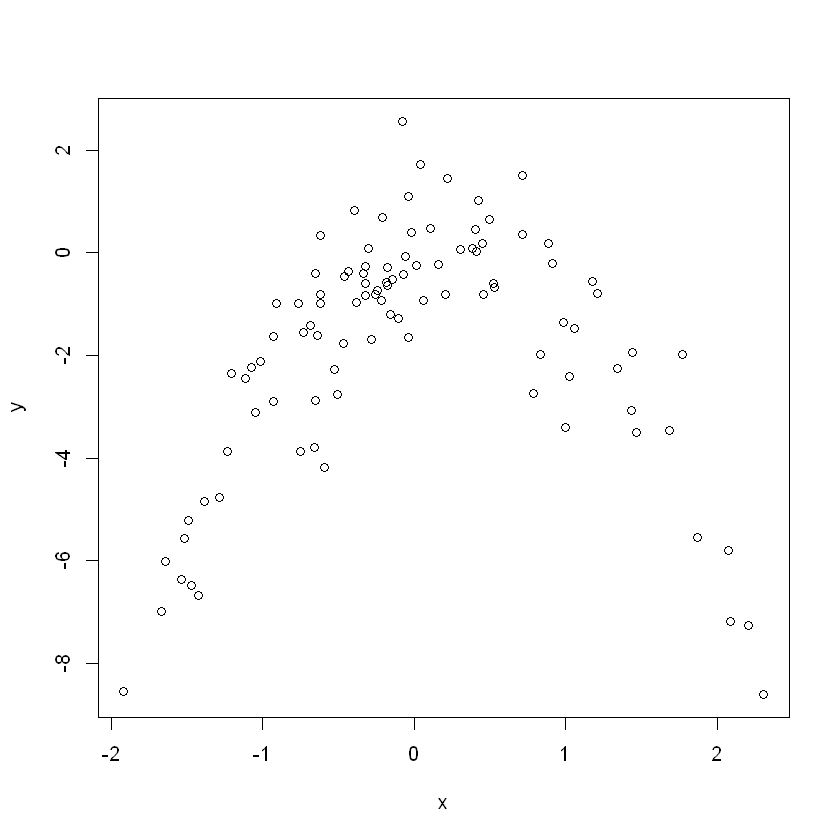

In [9]:
# part b - check relationship between x and y

plot(x, y)

# The relationship between X and Y is quadratic

In [16]:
# part c

set.seed(123)
install.packages("ISLR")
install.packages("MASS")
library(boot)
# create combined dataframe
df_loocv <- data.frame(y, x, x2=x^2, x3=x^3, x4=x^4)

# loocv error for model 1
model1 <- glm(y ~ x, data=df_loocv)
cv.loocverror1 <- cv.glm(df_loocv, model1)
cv.loocverror1$delta

# loocv error for model 2
model2 <- glm(y ~ x + x2, data=df_loocv)
cv.loocverror2 <- cv.glm(df_loocv, model2)
cv.loocverror2$delta

# loocv error for model 3
model3 <- glm(y ~ x + x2 + x3, data=df_loocv)
cv.loocverror3 <- cv.glm(df_loocv, model3)
cv.loocverror3$delta

# loocv error for model 4
model4 <- glm(y ~ x + x2 + x3 + x4, data=df_loocv)
cv.loocverror4 <- cv.glm(df_loocv, model4)
cv.loocverror4$delta


Installing package into 'C:/Users/skamal/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'ISLR' is in use and will not be installed"Installing package into 'C:/Users/skamal/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'MASS' is in use and will not be installed"

[1] 5.890979 5.888812

[1] 1.086596 1.086326

[1] 1.102585 1.102227

[1] 1.114772 1.114334

In [18]:
# part d

set.seed(213)

# create combined dataframe
df_loocv <- data.frame(y, x, x2=x^2, x3=x^3, x4=x^4)

# loocv error for model 1
model1 <- glm(y ~ x, data=df_loocv)
cv.loocverror1 <- cv.glm(df_loocv, model1)
cv.loocverror1$delta

# loocv error for model 2
model2 <- glm(y ~ x + x2, data=df_loocv)
cv.loocverror2 <- cv.glm(df_loocv, model2)
cv.loocverror2$delta

# loocv error for model 3
model3 <- glm(y ~ x + x2 + x3, data=df_loocv)
cv.loocverror3 <- cv.glm(df_loocv, model3)
cv.loocverror3$delta

# loocv error for model 4
model4 <- glm(y ~ x + x2 + x3 + x4, data=df_loocv)
cv.loocverror4 <- cv.glm(df_loocv, model4)
cv.loocverror4$delta

# Results are exactly the same in part c and d despite different seeds because LOOCV predicts every observation using the all of the rest of the observations so the seed doesnt matter 

[1] 5.890979 5.888812

[1] 1.086596 1.086326

[1] 1.102585 1.102227

[1] 1.114772 1.114334

In [ ]:
# part e

# The loocv error is lowest for the second model. 
# While I did not expect this result (I thought higher polynomial degree would lead to lower error rate and better fit). 
# However it is important to test the different models as the results show that using the second model would give the lowest loocv error
# after this it will start to overfit the data and the error will increase therefore second model is optimal

In [22]:
# part f - check which are statistically significant predictors

model_all <- lm(y ~ poly(x,4))
summary(model_all)

# The summary shows that only x and x^2 are statistically significant (p < .005). 
# This aligns with results from part e which also say that the second model (with only x and x^2) is the best one (lowest loocv error)




Call:
lm(formula = y ~ poly(x, 4))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8914 -0.5244  0.0749  0.5932  2.7796 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.8277     0.1041 -17.549   <2e-16 ***
poly(x, 4)1   2.3164     1.0415   2.224   0.0285 *  
poly(x, 4)2 -21.0586     1.0415 -20.220   <2e-16 ***
poly(x, 4)3  -0.3048     1.0415  -0.293   0.7704    
poly(x, 4)4  -0.4926     1.0415  -0.473   0.6373    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.041 on 95 degrees of freedom
Multiple R-squared:  0.8134,	Adjusted R-squared:  0.8055 
F-statistic: 103.5 on 4 and 95 DF,  p-value: < 2.2e-16


In [ ]:
# question 1 chapter 6

# part a

# Best subset will have the smallest train RSS because it will look at all possible combinations of the variables to find the best combination
# The models will optimize on the training RSS - using best subset we will try every model that forward and backward selection will try, along with all other possible models
# therefore training RSS will be smallest for best subset selection as it will find the optimal model for the training set

In [ ]:
# part b

# The best test RSS model could be for any of the three methods.We need look at cross validation error or some other metric like Cp, AIC, BIC or adjusted R square before we can accurately say this.
# Best subset can overfit if the data has a large number of predictors compared to number of observations. 
# Forward and backward selection might not result in the same model but it will try the same number of models - either of the two could be better


In [ ]:
# part c

# i.TRUE 
# ii.TRUE
# iii.FALSE
# iv.FALSE
# v. FALSE

In [24]:
# question 9 chapter 6

# part a - split data into train and test sets
data(College)
set.seed(123)
trainid <- sample(1:nrow(College), nrow(College)/2)
training_set <- College[trainid,]
test_set <- College[-trainid,]


'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

In [71]:
# part b - fit a linear model on training set 

fit_linearmodel <- lm(Apps~., data=training_set)
predicted_linearmodel <- predict(fit_linearmodel, test_set)

# the error on the test set
error_lm <- mean((test_set$Apps - predicted_linearmodel)^2)
error_lm

[1] 1768.333

In [66]:
# part c - fit a ridge regression model

require(glmnet)
training_matrix <- model.matrix(Apps~., data=training_set)[,-1]
test_matrix <- model.matrix(Apps~., data=test_set)[,-1]
fit_ridgemodel <- cv.glmnet(training_matrix, training_set$Apps) 


min_lambda <- fit_ridgemodel$lambda.min  # optimal lambda is the minimum lamda as there is high variance but low bias
min_lambda #optimal lamda identified by cross validation

# optimal lambda is using to predict on the test set
pred_ridgemodel <- predict(fit_ridgemodel, s=min_lambda, test_matrix)

# test error for the ridge regression model
error_ridge <- mean((test_set$Apps - pred_ridgemodel)^2)  
error_ridge

[1] 21.80336

[1] 1397441

In [60]:
# part d - fit lasso regression model

fit_lassomodel <- cv.glmnet(training_matrix, training_set$Apps, alpha=1)

min_lambda <- fit_lassomodel$lambda.min  # optimal lambda identified through cross validation is the minimum lamda
min_lambda

# optimal lambda is using to predict on the test set
pred_lassomodel <- predict(fit_lassomodel, s=min_lambda, test_matrix)

# test error for the lasso regression model
error_lasso <- mean((test_set$Apps - pred_lassomodel)^2)  
error_lasso

# number of non-zero coefficient estimates is 14 (not including the y intercept)
coefficients <- predict(fit_lassomodel, type="coefficients", s=min_lambda)[1:ncol(College),]
coefficients[coefficients != 0]
length(coefficients[coefficients != 0])

[1] 19.86641

[1] 1396598

(Intercept)    PrivateYes        Accept     Top10perc     Top25perc 
-400.05515789 -722.43384962    1.33125343   27.21007479   -0.04428399 
     Outstate    Room.Board      Personal           PhD      Terminal 
  -0.03232087    0.13185921   -0.04718473   -3.59042759   -6.14932619 
  perc.alumni        Expend     Grad.Rate 
  -7.39940716    0.07743361    7.82832213

[1] 13

Installing package into 'C:/Users/skamal/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'pls' is in use and will not be installed"

Data: 	X dimension: 388 17 
	Y dimension: 388 1
Fit method: svdpc
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            3258     3221     1664     1619     1329     1321     1221
adjCV         3258     3222     1663     1617     1317     1317     1218
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1217     1219     1153      1152      1153      1156      1161
adjCV     1218     1221     1150      1150      1150      1153      1158
       14 comps  15 comps  16 comps  17 comps
CV         1164      1160      1027      1024
adjCV      1161      1160      1022      1020

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X      32.969    59.69    66.68    72.25    77.31    81.82    85.18    88.34
Apps    3.259    74.43    76.35    84.40    84.42    86.69    86.79    87.0

[1] 1373995

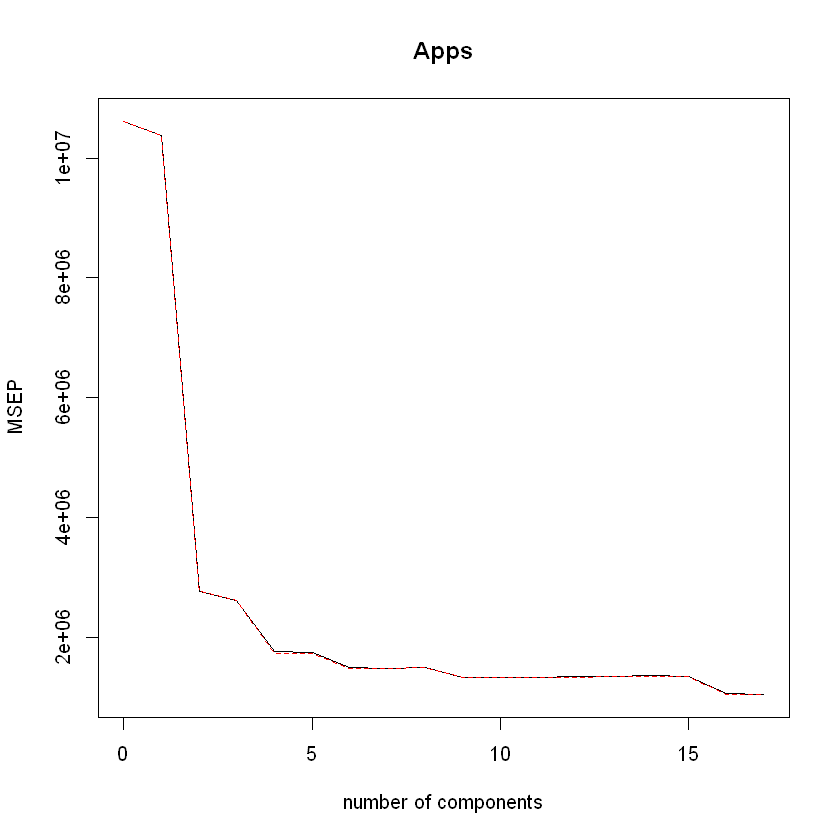

In [61]:
# part e - fit a PCR model

install.packages("pls")
require(pls)
set.seed(123)
fit_pcrmodel <- pcr(Apps~., data=training_set, scale=TRUE, validation="CV")
validationplot(fit_pcrmodel, val.type="MSEP")
summary(fit_pcrmodel)

 # value of M selected by cross validation is M=17 as min CV
pred_pcrmodel <- predict(fit_pcrmodel, test_set, ncomp=17) 

# test error for PCR model
error_pcr <- mean((test_set$Apps - pred_pcrmodel)^2)  
error_pcr


Data: 	X dimension: 388 17 
	Y dimension: 388 1
Fit method: kernelpls
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            3258     1502     1260     1137     1105     1070     1039
adjCV         3258     1501     1260     1135     1102     1067     1033
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1033     1026     1025      1023      1024      1025      1025
adjCV     1028     1021     1021      1019      1019      1020      1020
       14 comps  15 comps  16 comps  17 comps
CV         1025      1025      1024      1024
adjCV      1020      1020      1020      1020

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       26.97    43.83    65.16    69.79    73.63    76.18    79.97    81.98
Apps    79.33    85.98    88.76    89.67    90.59    91.43    91.54    

[1] 1384151

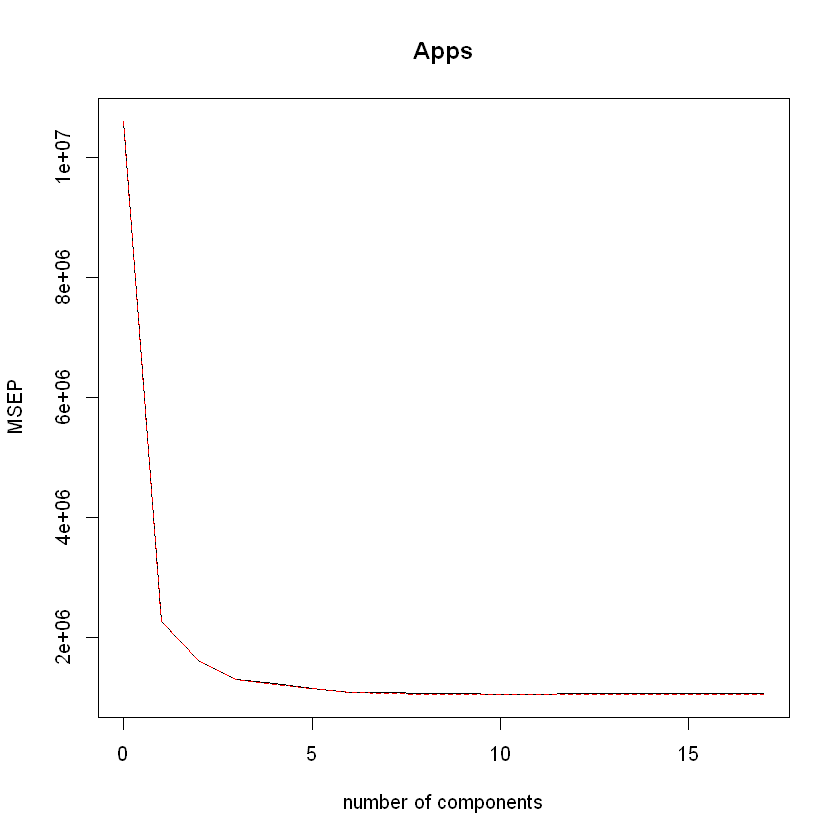

In [62]:
# part f - fit a PLS model

set.seed(123)

fit_plsmodel <- plsr(Apps~., data=training_set, scale=TRUE, validation="CV")
validationplot(fit_plsmodel, val.type="MSEP")
summary(fit_plsmodel)

 # value of M selected by cross validation is M=10 as min CV
pred_plsmodel <- predict(fit_plsmodel, test_set, ncomp=10)  

# test error for PLS model
error_pls <- mean((test_set$Apps - pred_plsmodel)^2) 
error_pls


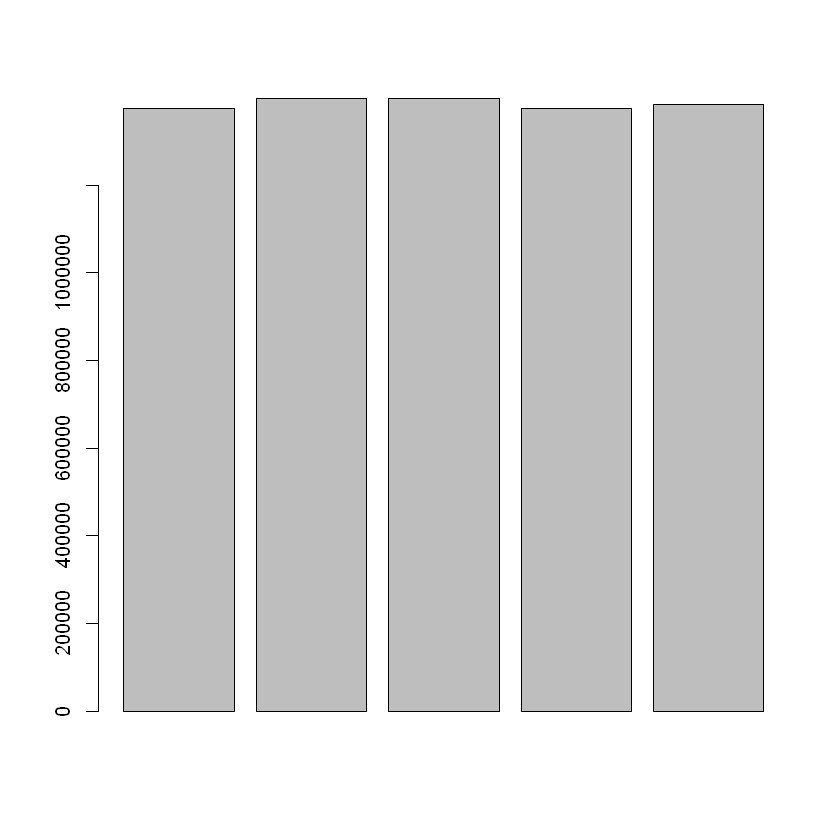

[1] -1373994

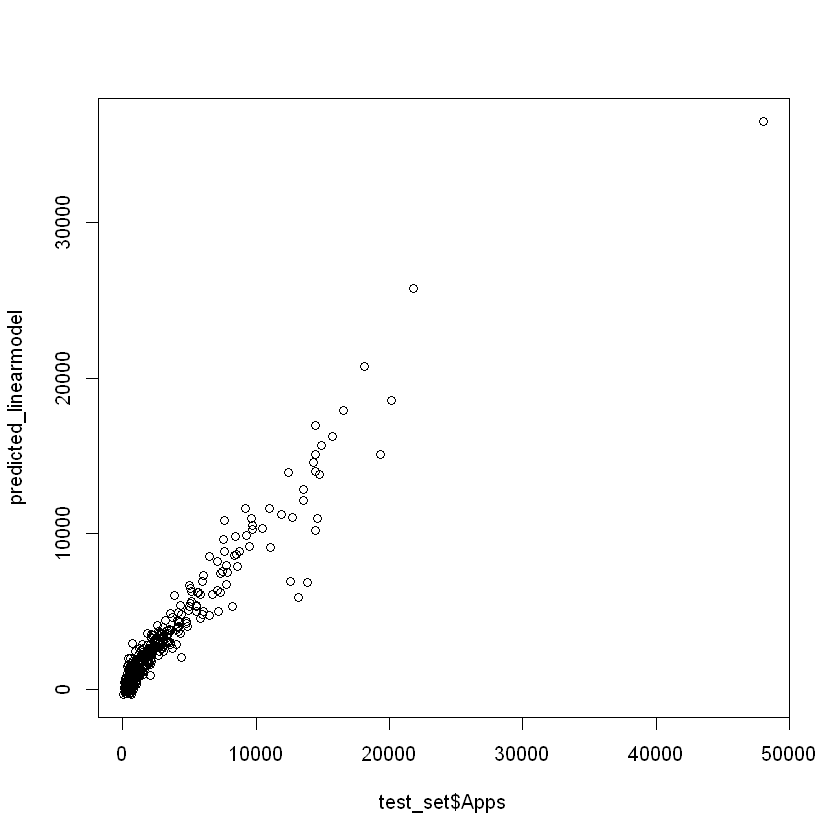

In [70]:
# part g
errors <- c(error_lm, error_ridge, error_lasso, error_pcr, error_pls)
barplot(errors)
# not alot of differences in the test errors obtained by the five different approaches 

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.5546951,0.00275939,201.020894,0.000000e+00
"poly(dis, 3)1",-2.0030959,0.06207094,-32.271071,1.597201e-124
"poly(dis, 3)2",0.8563300,0.06207094,13.795987,6.133104e-37
"poly(dis, 3)3",-0.3180490,0.06207094,-5.123959,4.274950e-07



Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


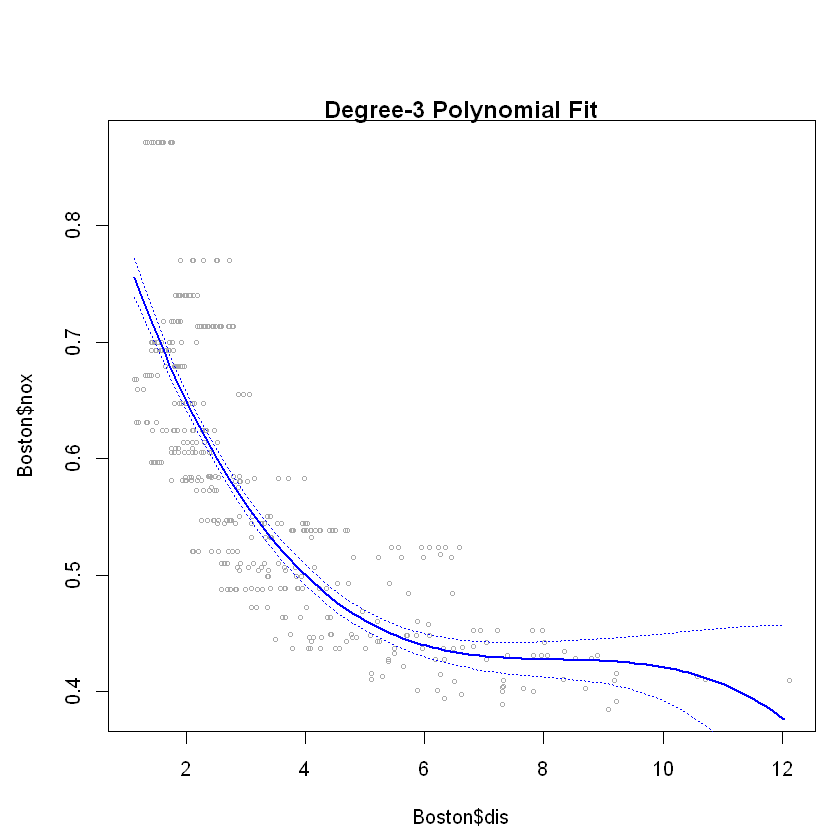

In [74]:
# exercise 9 chapter 7

# part a - fit a cubic polynomial regression

data(Boston)
set.seed(123)

# predict nox using dis 
fit_polymodel <- lm(nox~poly(dis,3), data=Boston)

#grid of values for dis at which we want predictions
dislims <- range(Boston$dis)
dis.grid <- seq(from=dislims[1], to=dislims[2], 0.1)

# predict and get standard errors
pred_polymodel <- predict(fit_polymodel, newdata=list(dis=dis.grid), se=TRUE)
bands <- cbind(pred_polymodel$fit + 2*pred_polymodel$se.fit, pred_polymodel$fit - 2*pred_polymodel$se.fit)

# plot the data and add the fit from the degree 3 polynomial
par(mfrow=c(1,1), mar=c(4.5,4.5,1,1), oma=c(0,0,4,0))
plot(Boston$dis, Boston$nox, xlim=dislims, cex=0.5, col="darkgrey")
title("Degree-3 Polynomial Fit")
lines(dis.grid, pred_polymodel$fit, lwd=2, col="blue")
matlines(dis.grid, bands, lwd=1, col="blue", lty=3)
summary(fit_polymodel)

[1] 2.768563 2.035262 1.934107 1.932981 1.915290 1.878257 1.849484 1.835630
 [9] 1.833331 1.832171

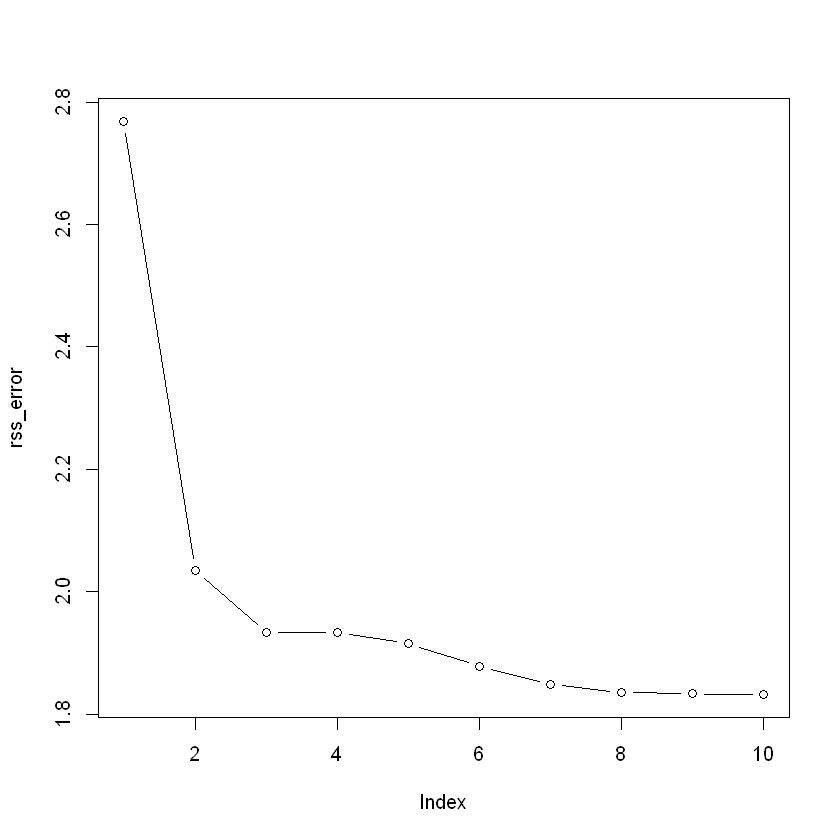

In [76]:
# part b - plot polynomial fits for range of polynomial degrees (1-10)

rss_error <- rep(0,10)
for (i in 1:10) {
  fit_model <- lm(nox~poly(dis,i), data=Boston)
  rss_error[i] <- sum(fit_model$residuals^2)
}

# residual sum of squares for polynomial degree 1 to 10
rss_error
plot(rss_error, type="b")  

[1] 0.005513459 0.004083877 0.003873764 0.003912737 0.004129041 0.005440390
 [7] 0.010297393 0.013651886 0.014866196 0.008931853

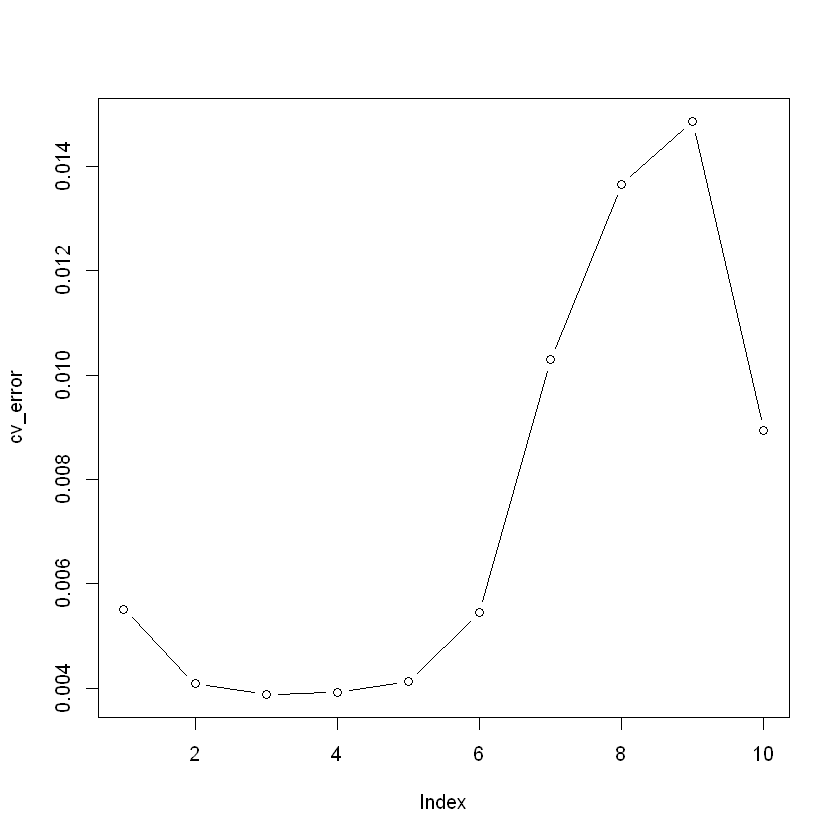

In [77]:
# part c - use crossvalidation to select the optimal degree for polynomial

require(boot)
set.seed(123)
cv_error <- rep(0,10)
for (i in 1:10) {
  fit_glm <- glm(nox~poly(dis,i), data=Boston)
  cv_error[i] <- cv.glm(Boston, fit_glm, K=10)$delta[1] 
}
cv_error
plot(cv_error, type="b")  

# the optimal fit is with the 3rd degree polynomial as it has the lowest cv error. However, 4th degree polynomial is very close.
# the cv error increases drastically after 7th degree polynomial

50% 
3.20745

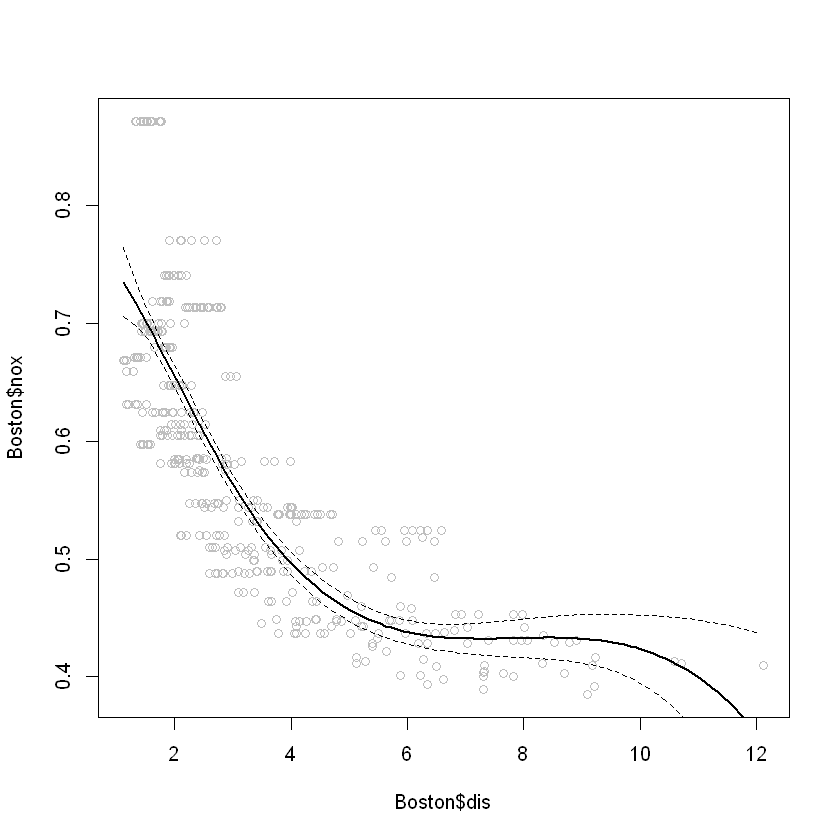

In [80]:
# part d - fit regression spline to predict nox using dis

require(splines)

# fit model 4 degrees of freedom
fit_lm <- lm(nox~bs(dis, df=4), data=Boston)

# predict
pred_lm <- predict(fit_lm, newdata=list(dis=dis.grid), se=T)

# plot the fit
plot(Boston$dis, Boston$nox, col="gray")
lines(dis.grid, pred_lm$fit, lwd=2)
lines(dis.grid, pred_lm$fit+2*pred_lm$se, lty="dashed")
lines(dis.grid, pred_lm$fit-2*pred_lm$se, lty="dashed")

# set df to 4 to select knots at uniform quantiles of `dis`
attr(bs(Boston$dis,df=4),"knots")  # only 1 knot at 50th percentile



[1] 1.922775 1.840173 1.833966 1.829884 1.816995 1.825653 1.792535

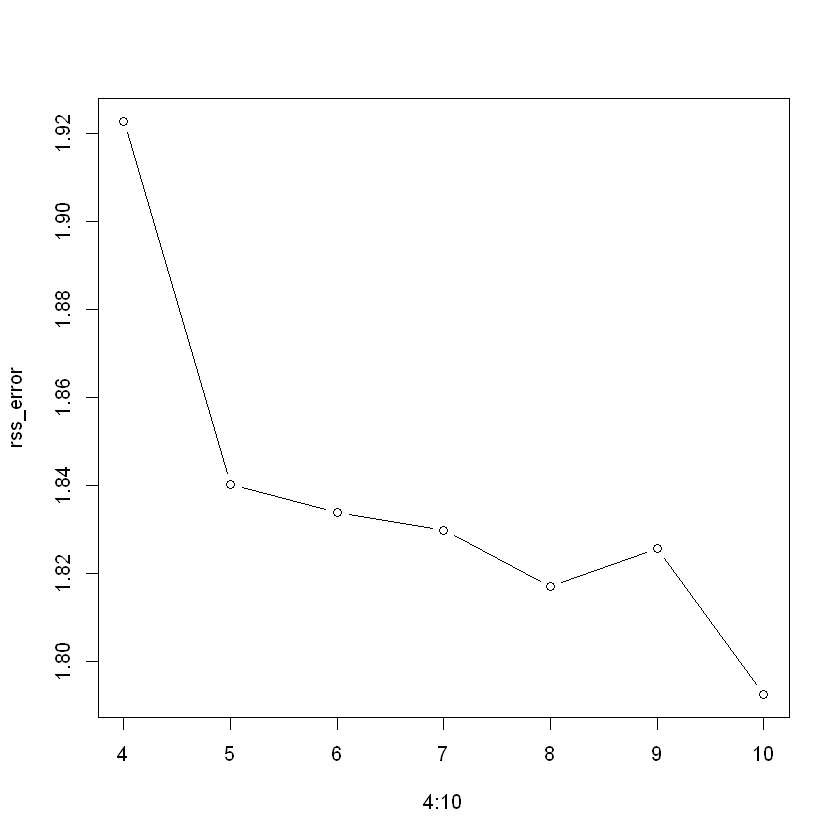

In [82]:
#part e - fit regression spline for range of degrees of freedom

set.seed(123)

rss_error <- rep(0,7)
for (i in 4:10) {
  fit_lm <- lm(nox~bs(dis, df=i), data=Boston)
  rss_error[i-3] <- sum(fit_lm$residuals^2)
}
rss_error
plot(4:10, rss_error, type="b")  
# RSS decreases on the training set with more flexible fit as degrees of freedom are increased. RSS is lowest at 10 degrees of freedom

Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.1523), Boundary.knots = c(1.1691, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.1523), Boundary.knots = c(1.1691, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`33.33333%` = 2.35953333333333, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`33.33333%` = 2.35953333333333, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`33.33333%` = 2.38883333333333, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`33.33333%` = 2.38883333333333, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots 

[1] 0.003879631 0.003690636 0.003711378 0.003743247 0.003705823 0.003765864
[7] 0.003693892

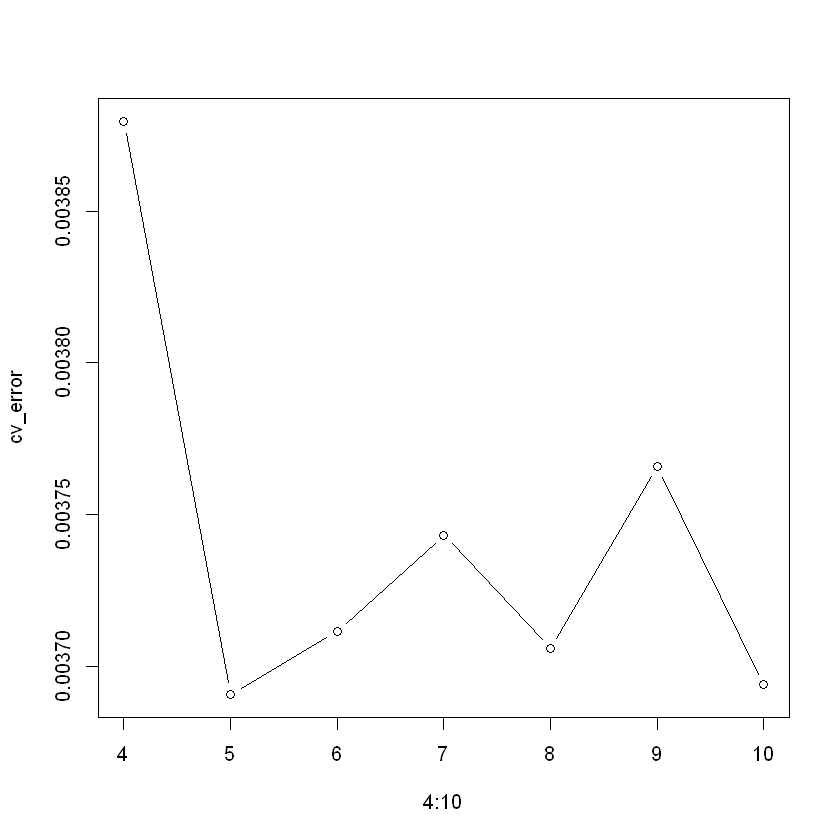

In [83]:
# part f - use cross validation to select best degrees of freedom


set.seed(123)

cv_error <- rep(0,7)
for (i in 4:10) {
  fit_glm <- glm(nox~bs(dis, df=i), data=Boston)
  cv_error[i-3] <- cv.glm(Boston, fit_glm, K=10)$delta[1]
}
cv_error
plot(4:10, cv_error, type="b")  
# according to the cross validation (minimum cv error) we should use at least 5 degrees of freedom where cv error is lowest. CV error increases again after 5 degrees of freedom

Installing package into 'C:/Users/skamal/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'leaps' is in use and will not be installed"

(Intercept)    PrivateYes    Room.Board      Terminal   perc.alumni 
-3697.5534635  3060.7883608     0.7010392    43.1190756    43.1830820 
       Expend     Grad.Rate 
    0.2600823    29.7766194

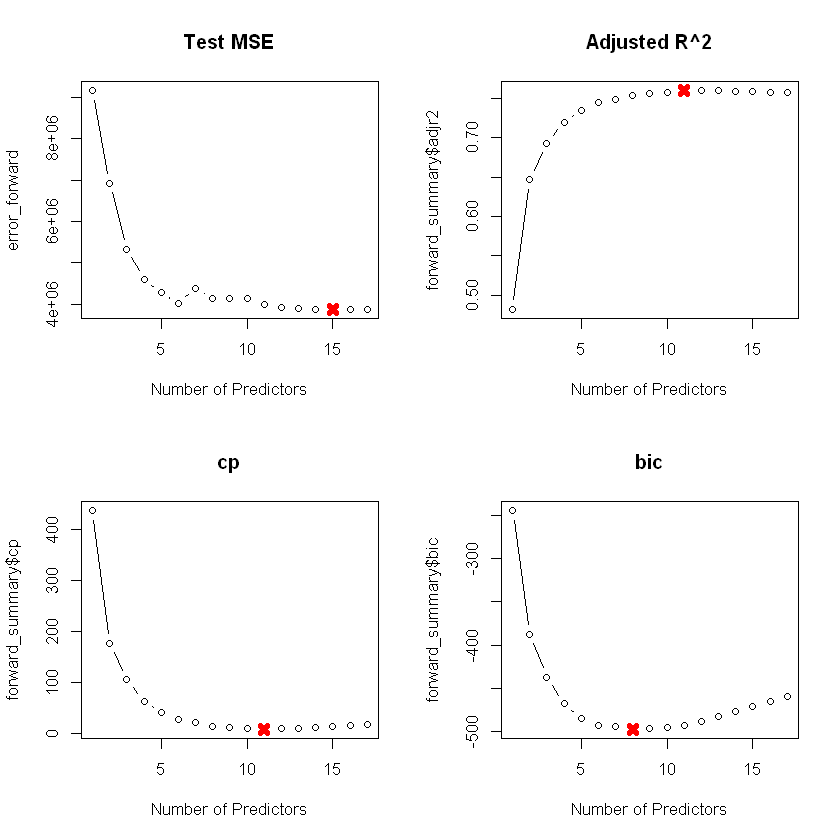

In [105]:
# exercise 10 chapter 7

# part a
install.packages("leaps")
library(leaps)
data(College)
set.seed(123)

# split data into training and test sets
trainid <- sample(1:nrow(College), nrow(College)/2)
training_set <- College[trainid,]
test_set <- College[-trainid,]

# predict function from chapter 6 labs
predict.regsubsets <- function(object, newdata, id, ...){
  form <- as.formula(object$call[[2]])
  matrix1 <- model.matrix(form, newdata)
  coeffs <- coef(object, id=id)
  xvars <- names(coeffs)
  matrix1[,xvars]%*%coeffs
}

# fit forward selection
fit_forward <- regsubsets(Outstate~., data=training_set, nvmax=ncol(College)-1)
forward_summary <- summary(fit_forward)
error_forward <- rep(NA, ncol(College)-1)
for(i in 1:(ncol(College)-1)) {
  predict_forward <- predict(fit_forward, test_set, id=i)
  error_forward[i] <- mean((test_set$Outstate - predict_forward)^2)
}

# plot the numbers predictors with MSE, adjusted R2, Cp, and BIC to identify how many predictors should be used optimally
par(mfrow=c(2,2))

# plot MSE
plot(error_forward, type="b", main="Test MSE", xlab="Number of Predictors")
min_error <- which.min(error_forward)  
points(min_error, error_forward[min_error], col="red", pch=4, lwd=5)

# plot adjusted R squared
plot(forward_summary$adjr2, type="b", main="Adjusted R^2", xlab="Number of Predictors")
max_adjr2 <- which.max(forward_summary$adjr2)  
points(max_adjr2, forward_summary$adjr2[max_adjr2], col="red", pch=4, lwd=5)

# plot Cp statistic
plot(forward_summary$cp, type="b", main="cp", xlab="Number of Predictors")
min_cp <- which.min(forward_summary$cp)  
points(min_cp, forward_summary$cp[min_cp], col="red", pch=4, lwd=5)

# plot BIC statistic
plot(forward_summary$bic, type="b", main="bic", xlab="Number of Predictors")
min_bic <- which.min(forward_summary$bic)  
points(min_bic, forward_summary$bic[min_bic], col="red", pch=4, lwd=5)

# model metrics do not improve much after 6 predictors
coef(fit_forward, 6)

Installing package into 'C:/Users/skamal/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'gam' is in use and will not be installed"Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"


Call: gam(formula = Outstate ~ Private + s(Room.Board, 3) + s(Terminal, 
    3) + s(perc.alumni, 3) + s(Expend, 3) + s(Grad.Rate, 3), 
    data = College)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-7110.16 -1137.02    50.44  1285.38  8278.86 

(Dispersion Parameter for gaussian family taken to be 3520187)

    Null Deviance: 12559297426 on 776 degrees of freedom
Residual Deviance: 2675342725 on 760.0001 degrees of freedom
AIC: 13936.36 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                   Df     Sum Sq    Mean Sq F value    Pr(>F)    
Private             1 3366732308 3366732308 956.407 < 2.2e-16 ***
s(Room.Board, 3)    1 2549088628 2549088628 724.134 < 2.2e-16 ***
s(Terminal, 3)      1  802254341  802254341 227.901 < 2.2e-16 ***
s(perc.alumni, 3)   1  525154274  525154274 149.184 < 2.2e-16 ***
s(Expend, 3)        1 1022010841 1022010841 290.329 < 2.2e-16 ***
s(Grad.Rate, 3)     1  151344060  151344060  42.993 1.014e-10 ***
Re

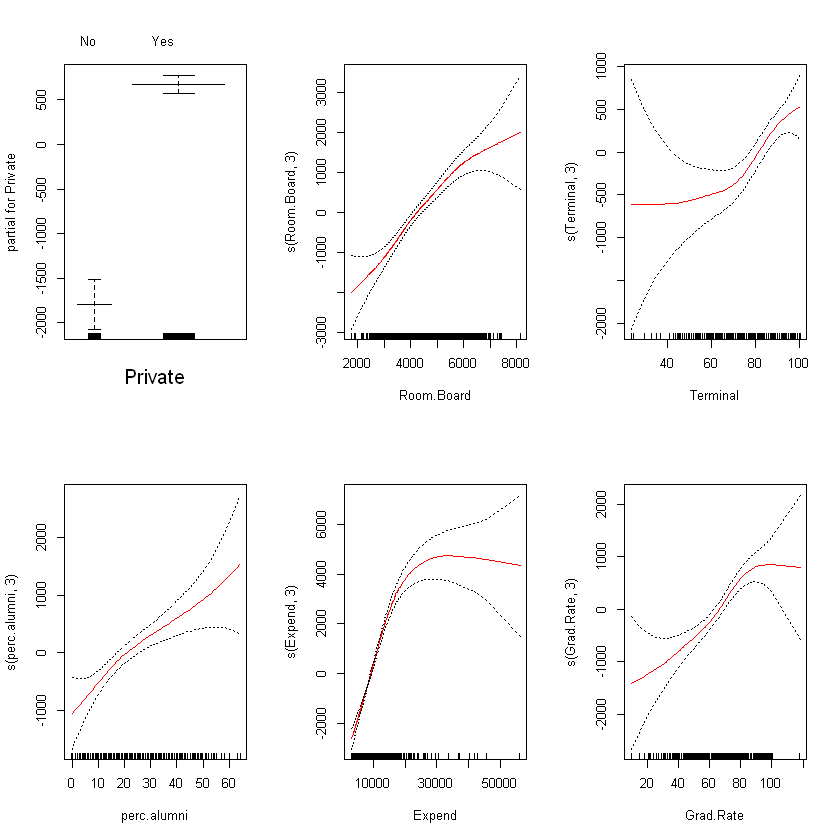

In [99]:
# part b - fit a generalized additive model

install.packages("gam")
library(gam)

# fit model 
fit_gammodel <- gam(Outstate ~  Private + s(Room.Board,3) + s(Terminal,3) + s(perc.alumni,3) + s(Expend,3) + s(Grad.Rate,3), data=College)

# plot results and see summary
par(mfrow=c(2,3))
plot(fit_gammodel, se=TRUE, col="red")
summary(fit_gammodel)

# the results show that non-linear terms are required for expend followed by grad.rate. non-linear terms may also be required for room.board and terminal

In [107]:
# part c - evaluate GAM model on test set

# fit model
predicted_gam <- predict(fit_gammodel, test_set)

# calculate test error
mse_error <- mean((test_set$Outstate - predicted_gam)^2)
mse_error


# the MSE error is better than the MSE error we got with the linear fit in part a



[1] 3331223

In [101]:
# part d

summary(fit_gammodel)

# Strong evidence of non-linear effects for `Expend` followed by moderate evidence for `Grad.Rate` (p < .05)
# Some evidence of non-linear effects for 'Room.board' and 'Terminal' (p <0.1)
# no evidence for `Perc.alumni` (p > 1)



Call: gam(formula = Outstate ~ Private + s(Room.Board, 3) + s(Terminal, 
    3) + s(perc.alumni, 3) + s(Expend, 3) + s(Grad.Rate, 3), 
    data = College)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-7110.16 -1137.02    50.44  1285.38  8278.86 

(Dispersion Parameter for gaussian family taken to be 3520187)

    Null Deviance: 12559297426 on 776 degrees of freedom
Residual Deviance: 2675342725 on 760.0001 degrees of freedom
AIC: 13936.36 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                   Df     Sum Sq    Mean Sq F value    Pr(>F)    
Private             1 3366732308 3366732308 956.407 < 2.2e-16 ***
s(Room.Board, 3)    1 2549088628 2549088628 724.134 < 2.2e-16 ***
s(Terminal, 3)      1  802254341  802254341 227.901 < 2.2e-16 ***
s(perc.alumni, 3)   1  525154274  525154274 149.184 < 2.2e-16 ***
s(Expend, 3)        1 1022010841 1022010841 290.329 < 2.2e-16 ***
s(Grad.Rate, 3)     1  151344060  151344060  42.993 1.014e-10 ***
Re